<a href="https://colab.research.google.com/github/buseskorkmaz/Sentiment-Analysis-with-Deep-Learning/blob/main/ULMFit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud
!pip install nltk.corpus
!pip install spacy 
!python -m spacy download en 

ERROR: Could not find a version that satisfies the requirement nltk.corpus (from versions: none)
ERROR: No matching distribution found for nltk.corpus
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
import pandas as pd
from fastai.text import *

In [ ]:
df = pd.read_json('financial_news_scored.json', orient = 'records', encoding='utf-8')
df['text'] = df['text'].map(lambda x: x.lstrip('BRIEF-'))
df['text'] = df['text'].map(lambda x: x.lstrip('UPDATE'))
df.set_index('index',inplace=True)
df= df.drop(columns=['versionCreated', 'storyId', 'sourceCode', 'storyText'])

In [ ]:
df.head()

,text,score
index,,
1599550751000,urkish lira edges further into record low terr...,-1
1599476798000,rdogan says Turkish economy will emerge strong...,1
1599249904617,itch Revises 6 Turkish LRG's Outlook to Negati...,-1
1599233579000,urkey limits maximum period of consumer loans ...,-1
1599233165000,Garanti Bankasi Authorizes Head Office To Issu...,1


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
neg_df = df[df['score']==-1]
neg_reasons = ' '.join(neg_df['text'])
cleaned_words = ' '.join([word for word in neg_reasons.split()])

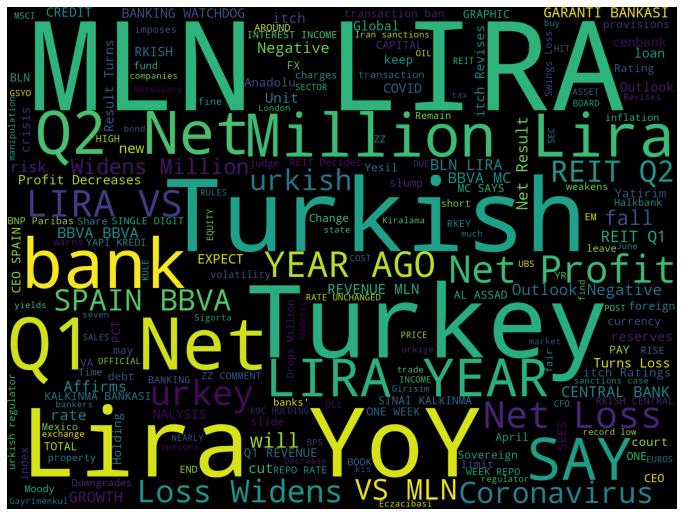

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=1500
                     ).generate(cleaned_words)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
pos_df = df[df['score']==1]
pos_reasons = ' '.join(pos_df['text'])
cleaned_words_pos = ' '.join([word for word in pos_reasons.split()])

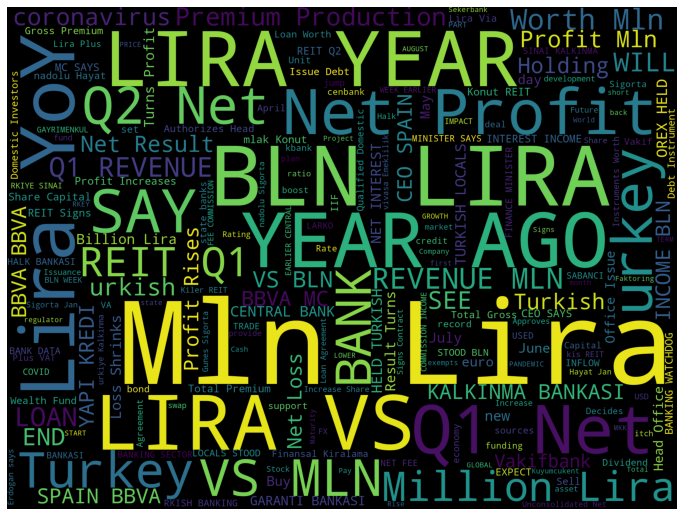

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=2000,
                      height=1500
                     ).generate(cleaned_words_pos)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

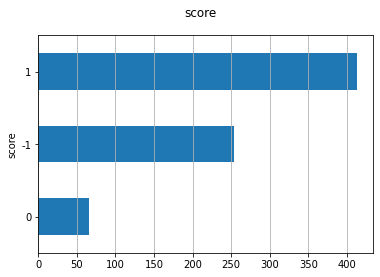

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("score", fontsize=12)
df["score"].reset_index().groupby("score").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [ ]:
df.shape[0]

733

In [ ]:
import re 
import nltk
from nltk.corpus import stopwords 
import html 
import spacy


In [ ]:
def clean_data(data): 
    data = data.str.replace('http?://[A-Za-z0-9./]+', " ")
    data = data.str.replace("[^a-zA-Z#]", " ")
    # removes short words
    data = data.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    return data

In [ ]:
df['clean_text'] = clean_data(df['text'])
print(df['clean_text'])

index
1599550751000      urkish lira edges further into record territory
1599476798000    rdogan says Turkish economy will emerge strong...
1599249904617    itch Revises Turkish Outlook Negative Sovereig...
1599233579000      urkey limits maximum period consumer loans from
1599233165000    Garanti Bankasi Authorizes Head Office Issue S...
                                       ...                        
1587042286000    Finansal Kiralama Decides Issue Debt Instrumen...
1587039044000    nadolu Hayat Says January March Total Premium ...
1587024632000             Spanish Banks Incorporating impact Covid
1587022181000    Turkish banks sees current valuations good ent...
1586963296000    countries agree debt freeze world poorest coun...
Name: clean_text, Length: 733, dtype: object


In [ ]:
def tokenize(data): 
    data = data.apply(lambda x : x.split())
    return data

In [ ]:
df['token'] = tokenize(df['clean_text'])
print(df['token'])

index
1599550751000    [urkish, lira, edges, further, into, record, t...
1599476798000    [rdogan, says, Turkish, economy, will, emerge,...
1599249904617    [itch, Revises, Turkish, Outlook, Negative, So...
1599233579000    [urkey, limits, maximum, period, consumer, loa...
1599233165000    [Garanti, Bankasi, Authorizes, Head, Office, I...
                                       ...                        
1587042286000    [Finansal, Kiralama, Decides, Issue, Debt, Ins...
1587039044000    [nadolu, Hayat, Says, January, March, Total, P...
1587024632000       [Spanish, Banks, Incorporating, impact, Covid]
1587022181000    [Turkish, banks, sees, current, valuations, go...
1586963296000    [countries, agree, debt, freeze, world, poores...
Name: token, Length: 733, dtype: object


In [ ]:
# randomize dataset
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)
df.sample(frac=1)

# data for classification model
df = df[['score', 'text']]

In [ ]:
df_trn, df_val = train_test_split(df, stratify = df['score'], test_size = 0.2)
df_val

,score,text
index,,
1596657902000,1,"Zynga raises full-year bookings forecast, buys..."
1596104960214,-1,CEO OF SPAIN'S BBVA <BBVA.MC> SAYS HOWEVER IF ...
1596097132125,1,CEO OF SPAIN'S BBVA <BBVA.MC> SAYS DOES NOT EX...
1589383913000,1,1-Private clubs in London cater to nurses and...
1591599600000,-1,NALYSIS-Emerging market corporate credit quali...
...,...,...
1595503874094,1,OREX HELD BY TURKISH LOCALS STOOD AT $203.97 B...
1596096119000,0,VA Expects Cost Of Risk In Mexico To Be In Lin...
1596104960214,1,CEO OF SPAIN'S BBVA <BBVA.MC> SAYS PRIORITY IS...


In [ ]:
from fastai import *

In [ ]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = df_trn, valid_df = df_val, path = "")
# Classifier model data
data_clas = TextClasDataBunch.from_df(train_df = df_trn, 
                                      valid_df = df_val, path = "", vocab=data_lm.train_ds.vocab, bs=32)

In [ ]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [ ]:
# perform and plot to find optimal learning rate 
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 8.32E-02
Min loss divided by 10: 2.29E-01


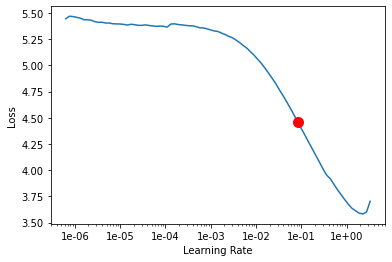

In [ ]:
learn.recorder.plot(suggestion=True)

In [ ]:
learn.fit_one_cycle(1, 2e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.148772,3.861019,0.400223,00:00


In [ ]:
learn.save('fit_head')


In [ ]:
learn.unfreeze()


In [ ]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))#120


epoch,train_loss,valid_loss,accuracy,time
0,3.431473,3.293886,0.442411,00:00
1,3.147379,2.753384,0.491295,00:00
2,2.825526,2.377880,0.543973,00:00
3,2.548619,2.200752,0.554911,00:00
4,2.321245,2.149974,0.562500,00:00
5,2.133814,2.095423,0.579241,00:00
6,1.971908,2.086329,0.581027,00:00
7,1.838951,2.091024,0.578795,00:00
8,1.729600,2.091883,0.576563,00:00
9,1.637348,2.117771,0.574330,00:00


In [ ]:
learn.save('fine_tuned')

In [ ]:
learn.save_encoder('fine_tuned_enc')


In [ ]:
data_clas.save('data_clas.pkl')
data_clas.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
"xxbos xxup ceo xxup of xxup spain xxup 's xxup bbva < xxup bbva.mc > xxup expects xxup also xxup xxunk xxup decrease xxup in xxup nii xxup in xxup spain xxup in 2020 xxup due xxup to xxup negative xxup loan xxup growth , xxup xxunk xxup offset xxup by xxup xxunk xxup funding xxup xxunk xxup xxunk",-1
"xxbos xxup rkey xxup 's xxup xxunk xxup istanbul xxup says xxup xxunk xxup short xxup selling xxup ban xxup on xxup xxunk xxup capital , xxup credit xxup xxunk xxup sec , xxup goldman xxup sachs , xxup merrill xxup lynch , xxup xxunk xxup morgan xxup sec . xxup and xxup xxunk xxup and xxup company",-1
"xxbos xxup cfo xxup of xxup spain xxup 's xxup bbva < xxup bbva.mc > xxup says xxup that xxup xxunk xxup it xxup can xxup resume xxup dividend xxup payments , xxup it xxup could xxup pay xxup part xxup in xxup cash xxup and xxup part xxup in xxup share - xxup buy - xxup xxunk",-1
"xxbos xxup ceo xxup of xxup spain xxup 's xxup bbva < xxup bbva.mc > xxup says xxup xxunk xxup are xxup no xxup major xxup xxunk xxup on xxup alleged xxup spying xxup case , xxup is xxup xxunk xxup xxunk xxup to xxup xxunk xxup with xxup xxunk xxup xxunk xxup in xxup spain",1
"xxbos xxup ceo xxup of xxup spain xxup 's xxup bbva < xxup bbva.mc > xxup expects xxup to xxup close xxunk xxup xxunk xxup in xxup spain xxup this xxup year , xxup sees xxup some xxup xxunk xxup on xxup the xxup pace xxup of xxup closures xxup for 2021",1


In [ ]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (586 items)
x: TextList
xxbos xxunk day hastens sovereign wealth funds ' refocus to home,xxbos xxmaj xxunk xxup reit xxup q1 xxmaj net xxmaj result xxmaj turns xxmaj to xxmaj profit xxmaj of xxunk xxmaj mln xxmaj lira yoy,xxbos xxunk xxmaj israel boycott , xxunk economic agreements - state news agency,xxbos xxmaj halk xxup reit xxup q1 xxmaj net xxmaj profit xxmaj increases xxmaj to 18.5 xxmaj mln xxmaj lira yoy,xxbos mlak xxup reit xxmaj signs xxmaj agreement xxmaj worth xxunk xxmaj mln xxmaj lira xxmaj for xxmaj xxunk xxmaj xxunk xxmaj project xxmaj with xxmaj contractor xxmaj xxunk xxmaj xxunk
y: CategoryList
1,1,1,1,1
Path: .;

Valid: LabelList (147 items)
x: TextList
xxbos xxmaj xxunk xxunk xxunk - year xxunk xxunk , buys xxunk xxmaj turkish game - xxunk,xxbos xxup ceo xxup of xxup spain xxup 's xxup bbva < xxup bbva.mc > xxup says xxup xxunk xxup if xxup new xxup xxunk xxup in xxup spain xxup are xxup xxunk xxup outlook xxup co

In [ ]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-02
Min loss divided by 10: 3.63E-02


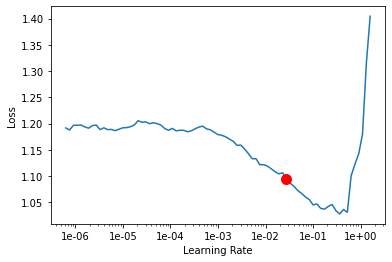

In [ ]:
learn.recorder.plot(suggestion=True)


In [ ]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.048449,0.889505,0.632653,00:00


In [ ]:
learn.save('first')

In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.879377,0.752459,0.673469,00:00


In [ ]:
learn.save('second')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.727181,0.670944,0.693878,00:00


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.611458,0.660343,0.714286,00:01
1,0.588563,0.640177,0.693878,00:01
2,0.566470,0.636315,0.700680,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.510919,0.649979,0.727891,00:01
1,0.482013,0.639343,0.714286,00:01
2,0.453517,0.644503,0.714286,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.396641,0.640449,0.714286,00:01
1,0.407059,0.647196,0.741497,00:01
2,0.397977,0.636708,0.748299,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.348281,0.680196,0.727891,00:01
1,0.344187,0.681343,0.748299,00:01
2,0.329117,0.659706,0.755102,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.302890,0.659167,0.755102,00:01
1,0.321930,0.671070,0.748299,00:01
2,0.300413,0.669266,0.734694,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.278969,0.685312,0.755102,00:01
1,0.256834,0.677998,0.727891,00:01
2,0.250819,0.696974,0.721088,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.206097,0.737917,0.714286,00:01
1,0.209506,0.705980,0.741497,00:01
2,0.203891,0.718139,0.734694,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.195458,0.744305,0.741497,00:01
1,0.214294,0.751300,0.734694,00:01
2,0.206331,0.739604,0.741497,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.207549,0.757259,0.768707,00:01
1,0.208764,0.770563,0.761905,00:01
2,0.193119,0.786502,0.761905,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.138027,0.723473,0.768707,00:01
1,0.162430,0.779362,0.755102,00:01
2,0.154805,0.739896,0.748299,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.157956,0.829959,0.741497,00:01
1,0.165317,0.813783,0.734694,00:01
2,0.162950,0.829241,0.721088,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.156028,0.781750,0.734694,00:01
1,0.148078,0.807409,0.727891,00:01
2,0.148070,0.784441,0.734694,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.145161,0.878623,0.741497,00:01
1,0.132526,0.832270,0.741497,00:01
2,0.130601,0.805213,0.721088,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.138500,0.920311,0.755102,00:01
1,0.136605,0.860025,0.755102,00:01
2,0.130884,0.875736,0.761905,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.122774,0.808514,0.761905,00:01
1,0.111997,0.883070,0.741497,00:01
2,0.118132,0.843468,0.755102,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.139349,0.897945,0.727891,00:01
1,0.124487,0.957534,0.741497,00:01
2,0.113187,0.908078,0.734694,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))##here

epoch,train_loss,valid_loss,accuracy,time
0,0.094188,0.861685,0.748299,00:01
1,0.103575,0.942765,0.748299,00:01
2,0.099530,0.905188,0.755102,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.084902,0.948632,0.755102,00:01
1,0.098391,1.018864,0.741497,00:01
2,0.093343,0.979031,0.748299,00:01


In [ ]:
learn.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.075340,0.964973,0.741497,00:01
1,0.066145,0.906151,0.782313,00:01
2,0.074257,1.014623,0.734694,00:01
3,0.080760,0.970247,0.721088,00:01
4,0.080188,0.917337,0.755102,00:01
5,0.084276,1.035517,0.748299,00:01
6,0.085678,0.958554,0.755102,00:01
7,0.078973,0.969122,0.748299,00:01
8,0.076657,0.965880,0.748299,00:01
9,0.080598,0.970294,0.755102,00:01


In [ ]:
learn.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.055704,0.978177,0.755102,00:01
1,0.056721,0.986022,0.748299,00:01
2,0.075404,1.025011,0.755102,00:01
3,0.069975,1.031600,0.721088,00:01
4,0.074161,1.086653,0.755102,00:01
5,0.077022,1.043482,0.761905,00:01
6,0.081011,0.990305,0.727891,00:01
7,0.075903,1.006821,0.748299,00:01
8,0.077034,0.973544,0.748299,00:01
9,0.073481,1.006149,0.748299,00:01


In [ ]:
learn.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.056818,1.001668,0.741497,00:01
1,0.051311,1.037793,0.734694,00:01
2,0.067131,1.103512,0.727891,00:01
3,0.078273,0.939959,0.782313,00:01
4,0.083658,0.938604,0.748299,00:01
5,0.091645,1.019146,0.755102,00:01
6,0.089149,0.929020,0.748299,00:01
7,0.083182,0.921914,0.748299,00:01
8,0.082723,0.975999,0.748299,00:01
9,0.080576,0.943580,0.761905,00:01


In [ ]:
learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.036110,0.949062,0.761905,00:01
1,0.059434,0.992907,0.755102,00:01
2,0.055712,0.986682,0.768707,00:01


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

df_val['pred_score'] = df_val['text'].apply(lambda row: str(learn.predict(row)[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print("Test Accuracy: ", accuracy_score(df_val['score'], df_val['pred_score'].astype(int)))

Test Accuracy:  0.7755102040816326


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

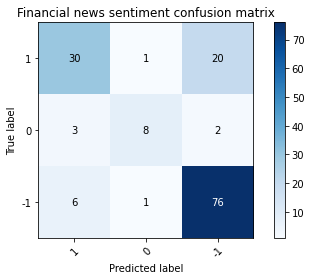

In [ ]:
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(df_val['score'], df_val['pred_score'].astype(int), classes=['1', '0', '-1'], title='Financial news sentiment confusion matrix')
plt.show()